In [1]:
import os, sys
sys.path.append(os.path.abspath('../../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results
from utils.rl.hv import HyperVolume

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]

def compute_hypervolume(df, antiutopia, utopia):
    array = df.values
    hv_computer = HyperVolume(antiutopia, utopia)
    return hv_computer.compute(array)

# Discrete 4-objective Lake Problem

In [31]:
results_path='../../results/lake4_discrete_performance_1/'
files=sorted(os.listdir(results_path))

utopia = np.array([0, 1.8, 1, 1])
antiutopia = np.array([-1.9, 0, 0, 0])

files

['.DS_Store',
 'ea_1274569960',
 'ea_1350287007',
 'ea_1883682950',
 'ea_1926216712',
 'ea_2097286424',
 'ea_2523200676',
 'ea_2861224539',
 'ea_3087161096',
 'ea_3186775264',
 'ea_3624030427',
 'ea_3668976038',
 'ea_3690172787',
 'ea_3885705317',
 'ea_462638671',
 'ea_562732020',
 'ea_617160326',
 'ea_674137616',
 'ea_703574460',
 'ea_956500800',
 'ea_96930842',
 'nes_best.csv',
 'nes_high.csv',
 'nes_high_policies.csv',
 'repsep_best.csv',
 'repsep_high.csv',
 'repsep_high_policies.csv']

In [3]:
ea_hv = []
for i in range(1, 21):
    ea=[]
    ea_files = sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ("avg_pollution", "utility", "inertia", "reliability"))
        ea.append(all_outcomes)
        # print(ea_files[j])
    ea=pd.DataFrame(ea)
    ea.iloc[:, 0] = -ea.iloc[:, 0]
    each_ea_hv = compute_hypervolume(ea, antiutopia, utopia)
    ea_hv.append(each_ea_hv)
    print(files[i])
    # print(ea)
    print(each_ea_hv)
ea_hv = np.array(ea_hv)
print(ea_hv.mean())
print(ea_hv.std())

ea_1274569960
0.3334691945676229
ea_1350287007
0.33312134152946254
ea_1883682950
0.33853568014400937
ea_1926216712
0.3384726837171054
ea_2097286424
0.33581581141386463
ea_2523200676
0.33305124791758556
ea_2861224539
0.3334045451020595
ea_3087161096
0.33219113375186504
ea_3186775264
0.3380481431543864
ea_3624030427
0.33326931196983856
ea_3668976038
0.33156014109192455
ea_3690172787
0.33473343898381513
ea_3885705317
0.33555664149375797
ea_462638671
0.3326196759796176
ea_562732020
0.3319744221479384
ea_617160326
0.3373683302200354
ea_674137616
0.3359085735304975
ea_703574460
0.33351458133163825
ea_956500800
0.3319853453101567
ea_96930842
0.3305503073576481
0.3342575275357415
0.0023574912116026327


In [4]:
path = files[22]
nes_hv = pd.read_csv(results_path + path).to_numpy()[0]
print(nes_hv.mean())
print(nes_hv.std())
print(path)

0.3293323705620713
0.0007609423065821256
nes_high.csv


In [5]:
path = files[25]
repsep_hv = pd.read_csv(results_path + path).to_numpy()[0]
print(repsep_hv.mean())
print(repsep_hv.std())
print(path)

0.32944693016387117
0.0013968813664309511
repsep_high.csv


In [32]:
ea=[]
path = files[4]
ea_files = sorted(os.listdir(results_path + path))
for i in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + path + "/" + ea_files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ("avg_pollution", "utility", "inertia", "reliability"))
    ea.append(all_outcomes)
    # print(path + "/" + ea_files[i])
print(path)
ea=pd.DataFrame(ea)
ea.iloc[:, 0] = -ea.iloc[:, 0]
each_ea_hv = compute_hypervolume(ea, antiutopia, utopia)
ea.iloc[:, 0] = -ea.iloc[:, 0]
ea["Algorithms"]="$\epsilon$-NSGA-II"
ea.columns = ['Avg Pollution (dimensionless)', 'Utility (dimensionless)', 'Inertia (dimensionless)', 'Reliability (dimensionless)', 'Algorithms']
print(each_ea_hv)
ea

ea_1926216712
0.3384726837171054


,Avg Pollution (dimensionless),Utility (dimensionless),Inertia (dimensionless),Reliability (dimensionless),Algorithms
0,0.920798,0.726757,1.000000,0.56,$\epsilon$-NSGA-II
1,0.197375,0.406942,0.979592,0.98,$\epsilon$-NSGA-II
2,0.194403,0.405053,0.938776,1.00,$\epsilon$-NSGA-II
3,0.456033,0.560042,0.897959,0.82,$\epsilon$-NSGA-II
4,1.173991,0.854936,1.000000,0.44,$\epsilon$-NSGA-II
...,...,...,...,...,...
158,0.946735,0.760178,0.897959,0.56,$\epsilon$-NSGA-II
159,0.354632,0.522425,0.938776,0.86,$\epsilon$-NSGA-II
160,0.199979,0.414775,0.918367,1.00,$\epsilon$-NSGA-II
161,0.245481,0.458115,0.938776,0.92,$\epsilon$-NSGA-II


In [33]:
path = files[23]
nes = pd.read_csv(results_path + path)
nes_hv = compute_hypervolume(nes, antiutopia, utopia)
nes.iloc[:, 0] = -nes.iloc[:, 0]
nes["Algorithms"]="MO-NES"
nes.columns = ['Avg Pollution (dimensionless)', 'Utility (dimensionless)', 'Inertia (dimensionless)', 'Reliability (dimensionless)', 'Algorithms']
print(path)
print(nes_hv)
nes

nes_high_policies.csv
0.3295233795177216


,Avg Pollution (dimensionless),Utility (dimensionless),Inertia (dimensionless),Reliability (dimensionless),Algorithms
0,0.057666,0.031680,1.0,1.00,MO-NES
1,0.956583,0.720238,1.0,0.54,MO-NES
2,0.424129,0.518855,1.0,0.82,MO-NES
3,0.155845,0.315838,1.0,1.00,MO-NES
4,1.408056,0.921897,1.0,0.32,MO-NES
...,...,...,...,...,...
121,0.648253,0.600674,1.0,0.70,MO-NES
122,1.531352,0.992512,1.0,0.26,MO-NES
123,1.264460,0.860572,1.0,0.40,MO-NES
124,0.086246,0.127166,1.0,1.00,MO-NES


In [34]:
path = files[26]
repsep = pd.read_csv(results_path + path)
repsep_hv = compute_hypervolume(repsep, antiutopia, utopia)
repsep.iloc[:, 0] = -repsep.iloc[:, 0]
repsep["Algorithms"]="MO-eREPS"
repsep.columns = ['Avg Pollution (dimensionless)', 'Utility (dimensionless)', 'Inertia (dimensionless)', 'Reliability (dimensionless)', 'Algorithms']
print(path)
print(repsep_hv)
repsep

repsep_high_policies.csv
0.33185183703953536


,Avg Pollution (dimensionless),Utility (dimensionless),Inertia (dimensionless),Reliability (dimensionless),Algorithms
0,0.217127,0.382155,1.0,1.00,MO-eREPS
1,0.291522,0.446039,1.0,0.94,MO-eREPS
2,0.151658,0.312366,1.0,1.00,MO-eREPS
3,1.406172,0.952789,1.0,0.34,MO-eREPS
4,0.196130,0.377310,1.0,1.00,MO-eREPS
...,...,...,...,...,...
155,0.349050,0.486411,1.0,0.88,MO-eREPS
156,0.310139,0.459628,1.0,0.92,MO-eREPS
157,0.336974,0.479562,1.0,0.88,MO-eREPS
158,0.354943,0.489835,1.0,0.88,MO-eREPS


<AxesSubplot:>

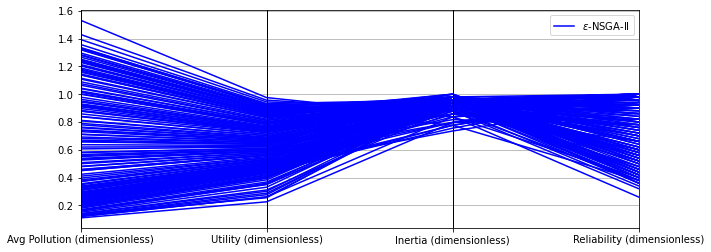

In [48]:
df = pd.concat([ea, nes, repsep])
pd.plotting.parallel_coordinates(
    ea, 'Algorithms', color=('blue')
)  

<AxesSubplot:>

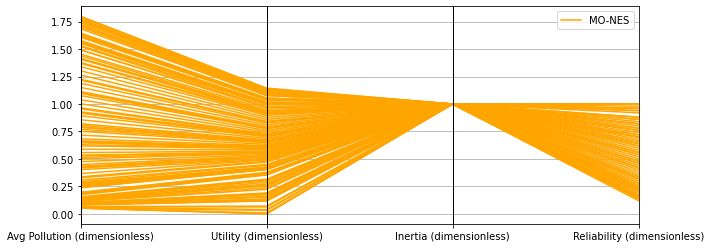

In [49]:
pd.plotting.parallel_coordinates(
    nes, 'Algorithms', color=('orange')
)  

<AxesSubplot:>

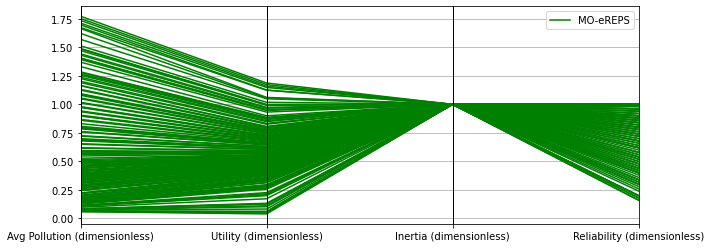

In [50]:
pd.plotting.parallel_coordinates(
    repsep, 'Algorithms', color=('green')
)  

# Deep Lake Problem

In [2]:
results_path='../../results/lake4_robust_performance/'
files=sorted(os.listdir(results_path))

utopia = np.array([0, 1.6, 1, 1])
antiutopia = np.array([-8.5, 0, 0, 0])

files

['.DS_Store',
 'ea_10th_1926216712',
 'ea_10th_3087161096',
 'ea_10th_3186775264',
 'ea_10th_3690172787',
 'ea_10th_462638671',
 'ea_avg_1926216712',
 'ea_avg_3087161096',
 'ea_avg_3186775264',
 'ea_avg_3690172787',
 'ea_avg_462638671',
 'nes_10th_best.csv',
 'nes_10th_high.csv',
 'nes_avg_best.csv',
 'nes_avg_high.csv',
 'nes_avg_high_policies.csv',
 'repsep_10th_best.csv',
 'repsep_10th_high.csv',
 'repsep_avg_best.csv',
 'repsep_avg_high.csv',
 'repsep_avg_high_policies.csv']

In [13]:
ea_10th_hv = []
for i in range(1, 6):
    ea=[]
    ea_files = sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ("avg_pollution", "utility", "inertia", "reliability"))
        ea.append(all_outcomes)
        # print(ea_files[j])
    ea=pd.DataFrame(ea)
    ea.iloc[:, 0] = -ea.iloc[:, 0]
    each_ea_10th_hv = compute_hypervolume(ea, antiutopia, utopia)
    ea_10th_hv.append(each_ea_10th_hv)
    print(files[i])
    # print(ea)
    print(each_ea_10th_hv)
ea_10th_hv = np.array(ea_10th_hv)
print(ea_10th_hv.mean())
print(ea_10th_hv.std())

ea_10th_1926216712
0.17625459423101852
ea_10th_3087161096
0.17322954853939618
ea_10th_3186775264
0.16953167426000487
ea_10th_3690172787
0.17558139336960238
ea_10th_462638671
0.17579870481617163
0.17407918304323872
0.002503897751580533


In [14]:
ea_avg_hv = []
for i in range(6, 11):
    ea=[]
    ea_files = sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ("avg_pollution", "utility", "inertia", "reliability"))
        ea.append(all_outcomes)
        # print(ea_files[j])
    ea=pd.DataFrame(ea)
    ea.iloc[:, 0] = -ea.iloc[:, 0]
    each_ea_avg_hv = compute_hypervolume(ea, antiutopia, utopia)
    ea_avg_hv.append(each_ea_avg_hv)
    print(files[i])
    # print(ea)
    print(each_ea_avg_hv)
ea_avg_hv = np.array(ea_avg_hv)
print(ea_avg_hv.mean())
print(ea_avg_hv.std())

ea_avg_1926216712
0.2294725650460291
ea_avg_3087161096
0.2265914792915844
ea_avg_3186775264
0.2268364457630109
ea_avg_3690172787
0.2238918667598972
ea_avg_462638671
0.2244854545394725
0.22625556227999882
0.001975839597790009


In [15]:
path = files[12]
nes_10th_hv = pd.read_csv(results_path + path).to_numpy()[0]
print(nes_10th_hv.mean())
print(nes_10th_hv.std())
print(path)

0.30030828167749163
0.005048522962518182
nes_10th_high.csv


In [16]:
path = files[14]
nes_avg_hv = pd.read_csv(results_path + path).to_numpy()[0]
print(nes_avg_hv.mean())
print(nes_avg_hv.std())
print(path)

0.33088141329529747
0.00919804529513415
nes_avg_high.csv


In [18]:
path = files[17]
repsep_10th_hv = pd.read_csv(results_path + path).to_numpy()[0]
print(repsep_10th_hv.mean())
print(repsep_10th_hv.std())
print(path)

0.2979854277131758
0.0067582293136939624
repsep_10th_high.csv


In [19]:
path = files[19]
repsep_avg_hv = pd.read_csv(results_path + path).to_numpy()[0]
print(repsep_avg_hv.mean())
print(repsep_avg_hv.std())
print(path)

0.33517246961963804
0.008836419167570216
repsep_avg_high.csv


In [9]:
ea=[]
path = files[6]
ea_files = sorted(os.listdir(results_path + path))
for i in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + path + "/" + ea_files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ("avg_pollution", "utility", "inertia", "reliability"))
    ea.append(all_outcomes)
    # print(path + "/" + ea_files[i])
print(path)
ea=pd.DataFrame(ea)
ea.iloc[:, 0] = -ea.iloc[:, 0]
each_ea_hv = compute_hypervolume(ea, antiutopia, utopia)
ea.iloc[:, 0] = -ea.iloc[:, 0]
ea["Algorithms"]="$\epsilon$-NSGA-II"
ea.columns = ['Avg Pollution (dimensionless)', 'Utility (dimensionless)', 'Inertia (dimensionless)', 'Reliability (dimensionless)', 'Algorithms']
print(each_ea_hv)
ea

ea_avg_1926216712
0.2294725650460291


,Avg Pollution (dimensionless),Utility (dimensionless),Inertia (dimensionless),Reliability (dimensionless),Algorithms
0,1.650952,0.330022,0.897959,0.64438,$\epsilon$-NSGA-II
1,2.428945,0.550526,0.877551,0.48506,$\epsilon$-NSGA-II
2,1.926552,0.404976,0.836735,0.58424,$\epsilon$-NSGA-II
3,2.187589,0.483234,0.877551,0.53098,$\epsilon$-NSGA-II
4,2.711095,0.648944,0.938776,0.41796,$\epsilon$-NSGA-II
...,...,...,...,...,...
308,2.411495,0.556711,0.918367,0.48228,$\epsilon$-NSGA-II
309,2.491191,0.578953,0.857143,0.46406,$\epsilon$-NSGA-II
310,2.527723,0.589682,0.897959,0.45964,$\epsilon$-NSGA-II
311,2.593020,0.608731,0.959184,0.44462,$\epsilon$-NSGA-II


In [10]:
path = files[15]
nes = pd.read_csv(results_path + path)
nes_hv = compute_hypervolume(nes, antiutopia, utopia)
nes.iloc[:, 0] = -nes.iloc[:, 0]
nes["Algorithms"]="MO-NES"
nes.columns = ['Avg Pollution (dimensionless)', 'Utility (dimensionless)', 'Inertia (dimensionless)', 'Reliability (dimensionless)', 'Algorithms']
print(path)
print(nes_hv)
nes

nes_avg_high_policies.csv
0.3488902678331967


,Avg Pollution (dimensionless),Utility (dimensionless),Inertia (dimensionless),Reliability (dimensionless),Algorithms
0,3.399418,0.933751,1.0,0.24012,MO-NES
1,0.726707,0.091592,1.0,0.86318,MO-NES
2,2.995821,0.868502,1.0,0.39772,MO-NES
3,2.170737,0.708778,1.0,0.62202,MO-NES
4,2.345371,0.748045,1.0,0.58098,MO-NES
...,...,...,...,...,...
448,0.865512,0.191916,1.0,0.84326,MO-NES
449,0.937528,0.234699,1.0,0.85380,MO-NES
450,2.211586,0.718488,1.0,0.61264,MO-NES
451,0.726342,0.074103,1.0,0.87628,MO-NES


In [11]:
path = files[20]
repsep = pd.read_csv(results_path + path)
repsep_hv = compute_hypervolume(repsep, antiutopia, utopia)
repsep.iloc[:, 0] = -repsep.iloc[:, 0]
repsep["Algorithms"]="MO-eREPS"
repsep.columns = ['Avg Pollution (dimensionless)', 'Utility (dimensionless)', 'Inertia (dimensionless)', 'Reliability (dimensionless)', 'Algorithms']
print(path)
print(repsep_hv)
repsep

repsep_avg_high_policies.csv
0.3460953659712388


,Avg Pollution (dimensionless),Utility (dimensionless),Inertia (dimensionless),Reliability (dimensionless),Algorithms
0,3.399365,0.933938,1.0,0.23974,MO-eREPS
1,1.071313,0.332710,1.0,0.83102,MO-eREPS
2,1.831831,0.599743,1.0,0.69308,MO-eREPS
3,3.377658,0.923739,1.0,0.24454,MO-eREPS
4,0.974457,0.285207,1.0,0.84186,MO-eREPS
...,...,...,...,...,...
851,2.032562,0.661016,1.0,0.65054,MO-eREPS
852,0.970880,0.279151,1.0,0.84314,MO-eREPS
853,0.713757,0.065231,1.0,0.87898,MO-eREPS
854,1.867652,0.613455,1.0,0.68536,MO-eREPS


<AxesSubplot:>

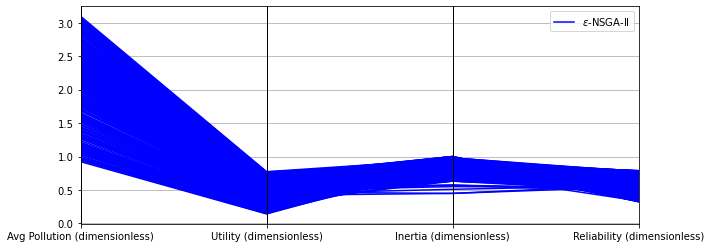

In [12]:
df = pd.concat([ea, nes, repsep])
pd.plotting.parallel_coordinates(
    ea, 'Algorithms', color=('blue')
)  

<AxesSubplot:>

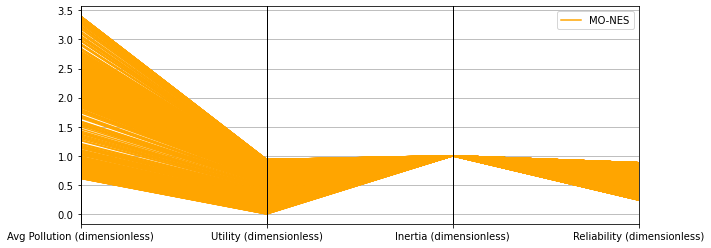

In [13]:
pd.plotting.parallel_coordinates(
    nes, 'Algorithms', color=('orange')
)  

<AxesSubplot:>

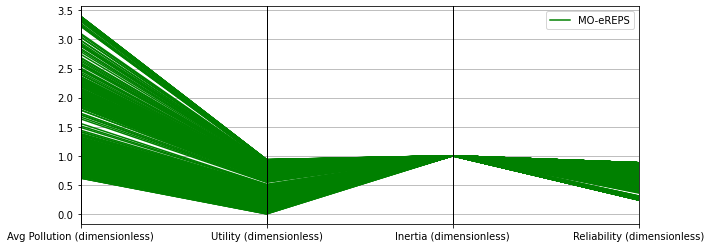

In [14]:
pd.plotting.parallel_coordinates(
    repsep, 'Algorithms', color=('green')
)  